In [3]:

import numpy as np
from util.plot import plot_cdf,color_list,plot_cdf_sub,plot_line
from util.consts import QueueEvent
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [9]:
dir_input="/data2/lichenni/path_perflow_empirical"
topo_type="_topo-pl-x_"
lr=10
data_list=[]
for shard in np.arange(200):
# for shard in np.random.choice(2000,100,replace=False):
# for shard in [534]:
    for n_flows in [2000]:
        for n_hosts in [3,5,7]:
            for shard_seed in [0]:
                topo_type_cur=topo_type.replace("-x_",f"-{n_hosts}_")+"s%d_i0"%(shard_seed)
                spec=f"shard{shard}_nflows{n_flows}_nhosts{n_hosts}_lr{lr}Gbps"
                dir_input_tmp = f"{dir_input}/{spec}"
                
                fid = np.load(f'{dir_input}/{spec}/fid{topo_type_cur}.npy')
                if len(fid)==len(set(fid)) and np.all(fid[:-1] <= fid[1:]) and len(fid)%n_flows==0:
                    data_list.append((spec,topo_type_cur,n_hosts))
                else:
                    print(f"fid not valid: {spec}")
print(f"len(data_list): {len(data_list)}")

len(data_list): 600


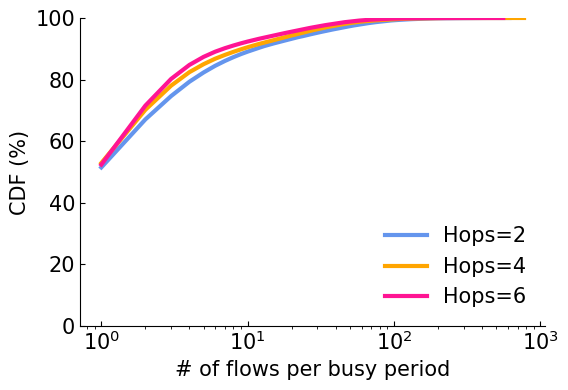

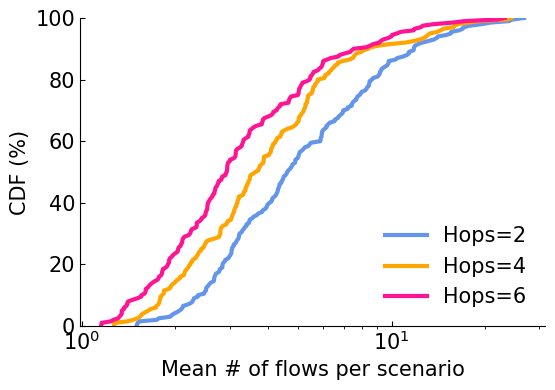

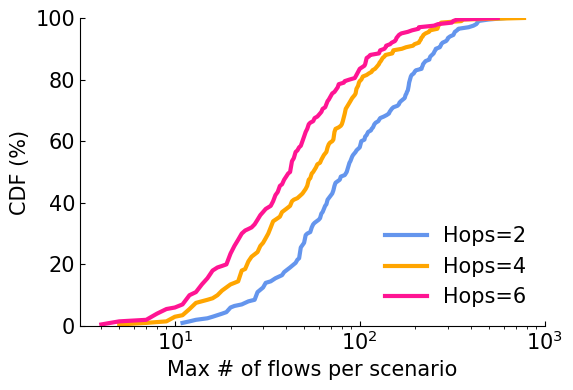

In [10]:
len_per_period_all=defaultdict(list)
len_per_period_all_mean=defaultdict(list)
len_per_period_all_max=defaultdict(list)
for spec_idx,(spec,topo_type,n_hosts) in enumerate(data_list):
    input_tmp=f"{dir_input}/{spec}"
    # Read the log file
    busy_periods=np.load(f'{input_tmp}/period{topo_type}.npy', allow_pickle=True)
    # len_per_period = np.array([len(period) for period in busy_periods])
    len_per_period = np.array([int(period[1])-int(period[0])+1 for period in busy_periods])
    len_per_period_all[n_hosts].extend(len_per_period)
    len_per_period_all_mean[n_hosts].append(len_per_period.mean())
    len_per_period_all_max[n_hosts].append(len_per_period.max())

legend_list=[f'Hops={n_hosts-1}' for n_hosts in len_per_period_all.keys()]
plot_data=[np.array(len_per_period_all[n_hosts]) for n_hosts in len_per_period_all.keys()]
fig_idx=0
plot_cdf(plot_data,None,legend_list,f'# of flows per busy period',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_mean[n_hosts]) for n_hosts in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Mean # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_max[n_hosts]) for n_hosts in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Max # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

        